# **Week7. Assignment (Keras)**
13기 이유민

# **0. Setting**

In [20]:
cd/content/drive/My Drive/tobigs

/content/drive/My Drive/tobigs


In [0]:
import pandas as pd
import numpy as np

# **1. Data & Preprocessing**

In [22]:
import numpy as np
import pandas as pd
import keras

sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

print(train.shape, test.shape)

(42000, 785) (18000, 785)


In [23]:
train.head() # 784 픽셀 확인

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# X, y 지정
X = train.iloc[:,1:].values
X = X.reshape(X.shape[0], 28, 28,1)

y = train.iloc[:,0].values
y = keras.utils.to_categorical(y,10) 

# X_test 지정
X_test = test.iloc[:,1:].values
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2018)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(33600, 28, 28, 1) (8400, 28, 28, 1) (33600, 10) (8400, 10)


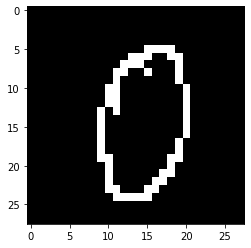

In [29]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1].reshape(28, 28), cmap="gray")

## **3. Define Model**

In [43]:
# 구글 참고
from keras.preprocessing.image import ImageDataGenerator

imagegen = ImageDataGenerator(
    rescale=1./255.,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip = False
)

valid_datagen = ImageDataGenerator(rescale=1./255)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
initial_learningrate=1e-3

def lr_decay(epoch):
    return initial_learningrate * 0.99 ** epoch

In [0]:
import tensorflow as tf
num_classes = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1), kernel_initializer='he_normal'),
  # weight initialization
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(64, (3,3), padding='same'), 
  tf.keras.layers.MaxPooling2D(3, 3),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.2),  # regularization / overfitting 방지

  tf.keras.layers.Conv2D(256, (3,3), padding='same'),
  tf.keras.layers.BatchNormalization(gamma_initializer="normal"),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),  # regularization

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.BatchNormalization(momentum=0.2, gamma_initializer='uniform'),   # batch normalization
  tf.keras.layers.Dense(num_classes, activation="softmax"),   # output shape : (10,1)
])

In [0]:
class myAccuracy(tf.keras.metrics.Accuracy):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true,1)
        y_pred = tf.argmax(y_pred,1)
        return super(myAccuracy,self).update_state(y_true,y_pred,sample_weight)

In [76]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=[myAccuracy()])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
activation_10 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 256)        

In [77]:
history = model.fit_generator(
      imagegen.flow(x_train,y_train, batch_size=10),
      steps_per_epoch=100,
      epochs=100,
      validation_data=valid_datagen.flow(x_val,y_val),
      validation_steps=50,  
      verbose=2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
100/100 - 4s - loss: 2.0139 - accuracy: 0.3890 - val_loss: 1.6953 - val_accuracy: 0.4638
Epoch 2/100
Epoch 1/100
100/100 - 1s - loss: 1.1822 - accuracy: 0.6590 - val_loss: 0.6258 - val_accuracy: 0.8619
Epoch 3/100
Epoch 1/100
100/100 - 2s - loss: 0.8387 - accuracy: 0.7430 - val_loss: 0.2316 - val_accuracy: 0.9550
Epoch 4/100
Epoch 1/100
100/100 - 1s - loss: 0.6251 - accuracy: 0.8160 - val_loss: 0.1481 - val_accuracy: 0.9588
Epoch 5/100
Epoch 1/100
100/100 - 1s - loss: 0.5167 - accuracy: 0.8400 - val_loss: 0.1233 - val_accuracy: 0.9619
Epoch 6/100
Epoch 1/100
100/100 - 2s - loss: 0.4615 - accuracy: 0.8610 - val_loss: 0.1121 - val_accuracy: 0.9688
Epoch 7/100
Epoch 1/100
100/100 - 2s - loss: 0.4180 - accuracy: 0.8820 - val_loss: 0.0926 - val_accuracy: 0.9688
Epoch 8/100
Epoch 1/100
100/100 - 1s - loss: 0.3698 - accuracy: 0.8890 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 9/100
Epoch 1/100
100/100 - 1s - loss: 0.3644 - accuracy: 0.8790 - val_loss: 0.1320 - val_accuracy: 0.

In [0]:
predictions = model.predict_classes(X_test)

In [79]:
predictions

array([8, 0, 5, ..., 3, 5, 9])

In [80]:
sample_submission["Category"] = pd.Series(predictions)
sample_submission

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8
...,...,...
17995,53718,8
17996,78,8
17997,33373,3
17998,36134,5


In [0]:
#저장
sample_submission.to_csv("radam_submission3.csv", index=False)

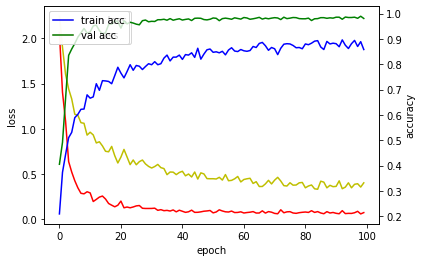

In [73]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()